<a href="https://colab.research.google.com/github/AbdulellahMoj/AI-Lab/blob/main/LogisticRegression_withEDA_Football_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Predict the outcome of a football match, based on historical match and player data.

provided with football matches dataset. This dataset includes historical match outcomes, player statistics, and other relevant factors. The objective is to develop a multiclass classification model that accurately predicts the result of a football match: "home win", "away win", or "draw".

target is the column: "Score".
are provided with the code to download and load the csv file.

Tasks:
> *  EDA & Preprocessing: check the following points and ADD COMMENTS findings:
>   
>    1- Imbalance.
>    
>    2- Missing values.
>    
>    3- Duplicates.
>    
>    4- Categorical values.
> * Baseline: Create a majority class baseline.
> * Build a ML model: Train and evaluate using K-Fold (K=5) without shuffling, and with F1 Score as the metric.
> * Plot the features importance of the model.
> * Performance: Achieve F1 Score ≥ 0.5



In [1]:
# my imports
import math  # for mathematical operations
from copy import deepcopy  # for copying object
import numpy as np  # for numerical operations
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

from sklearn.model_selection import train_test_split  # for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # for scaling the data
from sklearn.preprocessing import MinMaxScaler  # for scaling the data
from sklearn.preprocessing import LabelEncoder  # for encoding the labels
from sklearn.preprocessing import OneHotEncoder  # for one-hot encoding the categorical variables

from sklearn.linear_model import LinearRegression  # for linear regression model
from sklearn.linear_model import LogisticRegression  # for logistic regression model
from sklearn.metrics import confusion_matrix  # for calculating confusion matrix for classification task

from sklearn.metrics import mean_squared_error  # for calculating mean squared error
from sklearn.metrics import mean_absolute_error  # for calculating mean absolute error
from sklearn.metrics import r2_score  # for calculating r2 score
from sklearn.metrics import accuracy_score  # for calculating accuracy score
from sklearn.metrics import precision_score  # for calculating precision score
from sklearn.metrics import recall_score  # for calculating recall score
from sklearn.metrics import f1_score  # for calculating f1 score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import SGD



In [ ]:
# dont need it-
# url = 'https://drive.google.com/file/d/15R3R4O7CJdtnV8AhIDLYvtNoRtROf6dk/view?usp=sharing'
# file_id = url.split('/')[-2]
# download_url = f'https://drive.google.com/uc?id={file_id}'
# output = 'downloaded_file.csv'
# gdown.download(download_url, output, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=15R3R4O7CJdtnV8AhIDLYvtNoRtROf6dk
To: /content/downloaded_file.csv
100%|██████████| 122k/122k [00:00<00:00, 37.7MB/s]


In [ ]:
df = pd.read_csv('/content/Football_Data.csv')

In [ ]:
df.head()

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,Antennae,Andromeda,Away win,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,Andromeda,Antennae,Draw,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,Andromeda,Butterfly,Away win,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,Andromeda,Cigar,Away win,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,Andromeda,Circinus,Home Win,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   412 non-null    int64  
 1   Home Team                412 non-null    object 
 2   Away Team                412 non-null    object 
 3   Score                    412 non-null    object 
 4   Month                    412 non-null    int64  
 5   Year                     412 non-null    int64  
 6   WeekOfYear               412 non-null    int64  
 7   TotalShotsPerHomeTeam    412 non-null    float64
 8   TotalSoTPerHomeTeam      412 non-null    float64
 9   TotalPassesPerHomeTeam   412 non-null    float64
 10  TotalAccurPerHomeTeam    412 non-null    float64
 11  TotalInaccurPerHomeTeam  412 non-null    float64
 12  TotalShotsPerAwayTeam    412 non-null    float64
 13  TotalSoTPerAwayTeam      412 non-null    float64
 14  TotalPassesPerAwayTeam   4

EDA

Target Distribution:
Score
Home Win    0.398058
Draw        0.327670
Away win    0.274272
Name: proportion, dtype: float64


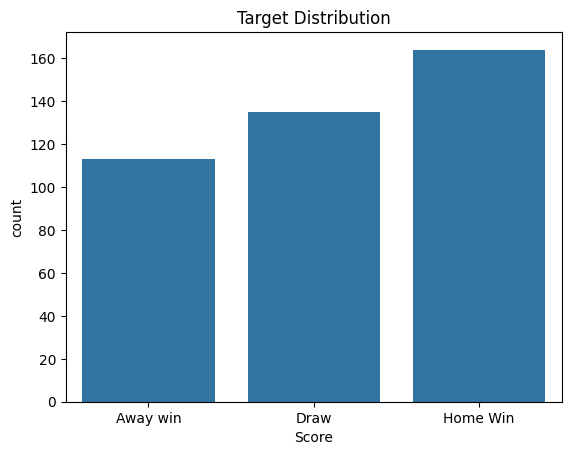

In [ ]:
# 1. Is the target imbalanced
def check_target_imbalance(df, target_column):
    print("Target Distribution:")
    print(df[target_column].value_counts(normalize=True))
    sns.countplot(x=df[target_column])
    plt.title("Target Distribution")
    plt.show()

check_target_imbalance(df, "Score")

In [ ]:
# we can see that there is a imbalance " where 'Home win' are more the 'Away win' and 'Draw score' "
# will need to use Stratified "StratifiedKFold"

In [ ]:
# 2. Do we have missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0])
    if missing_values.any():
        print("\nHandle Missing Values as needed.")
    else:
        print("\nNo Missing Values Found.")

check_missing_values(df)

Missing Values per Column:
Series([], dtype: int64)

No Missing Values Found.


In [ ]:
# We dont have missing Val

In [ ]:
# 3. Do we have duplicate samples
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"Number of Duplicate Samples: {duplicates}")
    if duplicates > 0:
        print("Dropping Duplicates...")
        df.drop_duplicates(inplace=True)
        print("Duplicates Dropped.")
    else:
        print("No Duplicate Samples Found.")

check_duplicates(df)

Number of Duplicate Samples: 0
No Duplicate Samples Found.


In [ ]:
# No duplicates

In [ ]:
# 4. Do we have categorical columns?
def encode_categorical_columns(df):
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print("Categorical Columns:", list(categorical_cols))

label_encoders = encode_categorical_columns(df)

Categorical Columns: ['Home Team', 'Away Team', 'Score']


In [ ]:
# We have several categorical columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,0.0,0.055556,0.000000,0,0.090909,0.5,0.123944,0.25000,0.2,0.167665,...,0.599369,0.365188,0.315789,0.133333,0.823345,0.804776,0.52,0.566667,0.545455,0.571429
1,0.0,0.000000,0.055556,1,0.727273,0.0,0.721127,0.15625,0.1,0.321856,...,0.293375,0.535836,0.105263,0.350000,0.772125,0.774030,0.48,0.333333,0.545455,0.571429
2,0.0,0.000000,0.166667,0,1.000000,0.0,0.971831,0.09375,0.0,0.660180,...,0.328076,0.133106,0.614035,0.416667,0.445993,0.273433,0.48,0.400000,0.454545,0.428571
3,0.0,0.000000,0.277778,0,0.000000,0.5,0.064789,0.15625,0.2,0.233533,...,0.293375,0.423208,0.368421,0.383333,0.571429,0.676418,0.40,0.366667,0.454545,0.500000
4,0.0,0.000000,0.333333,2,0.636364,0.0,0.661972,0.40625,0.2,0.470060,...,0.492114,0.546075,0.526316,0.583333,0.642857,0.654627,0.64,0.633333,0.545455,0.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.0,0.777778,0.666667,0,0.636364,0.0,0.673239,0.12500,0.0,0.491018,...,0.343849,0.348123,0.263158,0.383333,0.693380,0.609254,0.32,0.433333,0.454545,0.357143
408,0.0,0.666667,0.777778,2,0.090909,0.5,0.135211,0.46875,0.5,0.411677,...,0.400631,0.255973,0.192982,0.200000,0.785714,0.649552,0.64,0.566667,0.727273,0.642857
409,0.0,0.666667,0.833333,2,0.818182,0.0,0.830986,0.43750,0.4,0.312874,...,0.107256,0.317406,0.280702,0.300000,0.384321,0.637612,0.52,0.533333,0.636364,0.571429
410,0.0,0.722222,0.777778,1,0.636364,0.5,0.636620,0.43750,0.5,0.498503,...,0.331230,0.320819,0.105263,0.216667,0.801394,0.704179,0.72,0.566667,0.636364,0.500000


In [ ]:
# 5. Do we have different scales in the data
df

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,1,0,0,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,0,1,1,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,0,3,0,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,0,5,0,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,0,6,2,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,14,12,0,8,2016,241,4.0,0.0,556.0,...,190.0,157.0,40.0,47.0,0.8260,0.7695,-4.0,-2.0,-1.0,-2.0
408,1,12,14,2,2,2017,50,15.0,5.0,503.0,...,208.0,130.0,36.0,36.0,0.8525,0.7830,4.0,2.0,2.0,2.0
409,1,12,15,2,10,2016,297,14.0,4.0,437.0,...,115.0,148.0,41.0,42.0,0.7373,0.7790,1.0,1.0,1.0,1.0
410,1,13,14,1,8,2017,228,14.0,5.0,561.0,...,186.0,149.0,31.0,37.0,0.8570,0.8013,6.0,2.0,1.0,0.0


In [ ]:
#  USE MIN MAX TO SCALE
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Score")  ### DON'T SCALE THE TARGET
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,0.0,0.055556,0.000000,0,0.090909,0.5,0.123944,0.25000,0.2,0.167665,...,0.599369,0.365188,0.315789,0.133333,0.823345,0.804776,0.52,0.566667,0.545455,0.571429
1,0.0,0.000000,0.055556,1,0.727273,0.0,0.721127,0.15625,0.1,0.321856,...,0.293375,0.535836,0.105263,0.350000,0.772125,0.774030,0.48,0.333333,0.545455,0.571429
2,0.0,0.000000,0.166667,0,1.000000,0.0,0.971831,0.09375,0.0,0.660180,...,0.328076,0.133106,0.614035,0.416667,0.445993,0.273433,0.48,0.400000,0.454545,0.428571
3,0.0,0.000000,0.277778,0,0.000000,0.5,0.064789,0.15625,0.2,0.233533,...,0.293375,0.423208,0.368421,0.383333,0.571429,0.676418,0.40,0.366667,0.454545,0.500000
4,0.0,0.000000,0.333333,2,0.636364,0.0,0.661972,0.40625,0.2,0.470060,...,0.492114,0.546075,0.526316,0.583333,0.642857,0.654627,0.64,0.633333,0.545455,0.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.0,0.777778,0.666667,0,0.636364,0.0,0.673239,0.12500,0.0,0.491018,...,0.343849,0.348123,0.263158,0.383333,0.693380,0.609254,0.32,0.433333,0.454545,0.357143
408,0.0,0.666667,0.777778,2,0.090909,0.5,0.135211,0.46875,0.5,0.411677,...,0.400631,0.255973,0.192982,0.200000,0.785714,0.649552,0.64,0.566667,0.727273,0.642857
409,0.0,0.666667,0.833333,2,0.818182,0.0,0.830986,0.43750,0.4,0.312874,...,0.107256,0.317406,0.280702,0.300000,0.384321,0.637612,0.52,0.533333,0.636364,0.571429
410,0.0,0.722222,0.777778,1,0.636364,0.5,0.636620,0.43750,0.5,0.498503,...,0.331230,0.320819,0.105263,0.216667,0.801394,0.704179,0.72,0.566667,0.636364,0.500000


Train Model

Build a ML model: Train and evaluate using K-Fold (K=5) without shuffling, and with F1 Score as the metric.


In [ ]:
X = df.drop("Score",axis=1)
y = df['Score']

X.head()

,Season,Home Team,Away Team,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,TotalAccurPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,0.0,0.055556,0.000000,0.090909,0.5,0.123944,0.25000,0.2,0.167665,0.190317,...,0.599369,0.365188,0.315789,0.133333,0.823345,0.804776,0.52,0.566667,0.545455,0.571429
1,0.0,0.000000,0.055556,0.727273,0.0,0.721127,0.15625,0.1,0.321856,0.338898,...,0.293375,0.535836,0.105263,0.350000,0.772125,0.774030,0.48,0.333333,0.545455,0.571429
2,0.0,0.000000,0.166667,1.000000,0.0,0.971831,0.09375,0.0,0.660180,0.672788,...,0.328076,0.133106,0.614035,0.416667,0.445993,0.273433,0.48,0.400000,0.454545,0.428571
3,0.0,0.000000,0.277778,0.000000,0.5,0.064789,0.15625,0.2,0.233533,0.217028,...,0.293375,0.423208,0.368421,0.383333,0.571429,0.676418,0.40,0.366667,0.454545,0.500000
4,0.0,0.000000,0.333333,0.636364,0.0,0.661972,0.40625,0.2,0.470060,0.475793,...,0.492114,0.546075,0.526316,0.583333,0.642857,0.654627,0.64,0.633333,0.545455,0.642857


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classification models
model = LogisticRegression(max_iter=1000)


scores_accuracy = []
scores_precision = []
scores_recall = []
scores_f1 = []

    # Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=False)
for train_index, test_index in skf.split(X, y):
  # Split data into training and testing sets
  X_Train, X_Test = X.loc[train_index, :], X.loc[test_index, :]
  y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
  model.fit(X_Train, y_Train)
    # Predict on the test set
  y_pred = model.predict(X_Test)

        # Calculate metrics

  scores_f1.append(f1_score(y_Test, y_pred, average='weighted'))
  # extra
  scores_accuracy.append(accuracy_score(y_Test, y_pred))
  scores_precision.append(precision_score(y_Test, y_pred, average='weighted'))
  scores_recall.append(recall_score(y_Test, y_pred, average='weighted'))

    # Print the results
print(f" F1-Score: {np.mean(scores_f1):.4f}")
# extra
print(f" Accuracy: {np.mean(scores_accuracy):.4f}")
print(f" Precision: {np.mean(scores_precision):.4f}")
print(f" Recall: {np.mean(scores_recall):.4f}")



 F1-Score: 0.5128
 Accuracy: 0.5243
 Precision: 0.5145
 Recall: 0.5243



**Baseline: Create a majority class baseline.**

In [ ]:
# Calculate the majority class baseline
majority_class = y.value_counts().idxmax()
baseline_pred = [majority_class] * len(y)

# Evaluate the baseline
baseline_f1 = f1_score(y, baseline_pred, average='weighted')

print(f"Baseline F1-Score (majority class): {baseline_f1:.4f}")
# extra
baseline_accuracy = accuracy_score(y, baseline_pred)
baseline_precision = precision_score(y, baseline_pred, average='weighted')
baseline_recall = recall_score(y, baseline_pred, average='weighted')
print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")
print(f"Baseline Precision (majority class): {baseline_precision:.4f}")
print(f"Baseline Recall (majority class): {baseline_recall:.4f}")


Baseline F1-Score (majority class): 0.2267
Baseline Accuracy (majority class): 0.3981
Baseline Precision (majority class): 0.1585
Baseline Recall (majority class): 0.3981


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plot the features importance of your model.


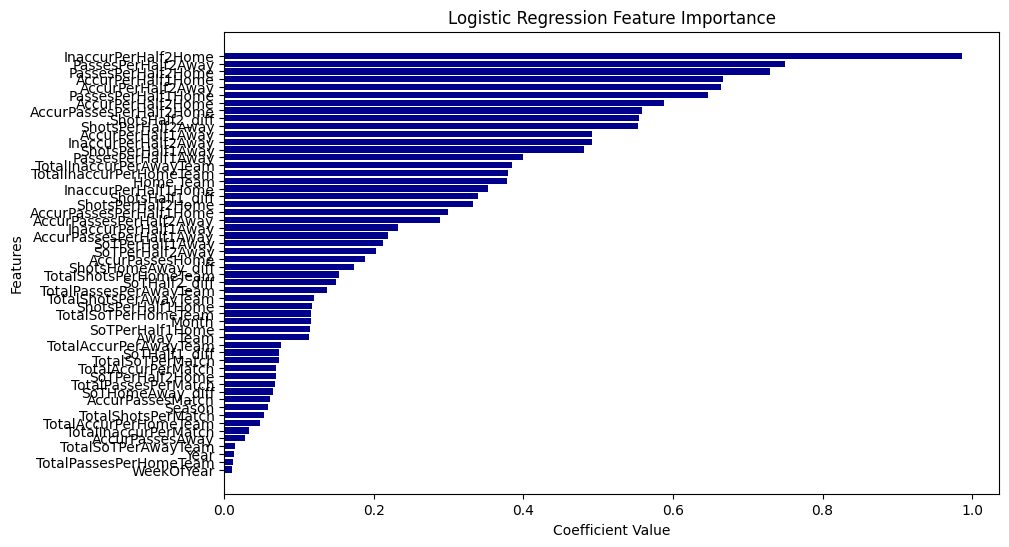

In [ ]:
logistic_importance = list(zip(X.columns, model.coef_[0]))
sorted_logistic_importance = sorted(logistic_importance, key=lambda x: abs(x[1]), reverse=True)

# Extract sorted features and their coefficients
features, coefficients = zip(*sorted_logistic_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, np.abs(coefficients), color='darkblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


Performance: Achieve F1 Score ≥ 0.5



Thanks to: Mohamed Eltayeb
